# NetworkX

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

Library documentation: <a>https://networkx.github.io/</a>

In [1]:
import networkx as nx
%matplotlib inline

In [2]:
G = nx.Graph()
[attr for attr in dir(G) if not attr.startswith('__')]

['_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edge',
 'remove_edges_from',
 'remove_node',
 'remove_nodes_from',
 'size',
 'subgraph',
 'to_directed',
 'to_directed_class',
 'to_undirected',
 'to_undirected_class',
 'update']

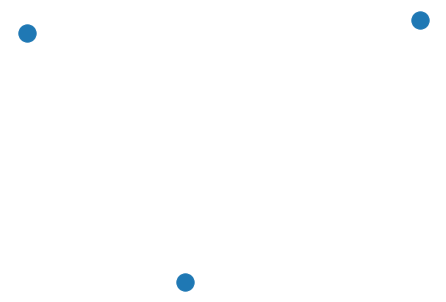

In [3]:
# basic add nodes
G.add_node(1)
G.add_nodes_from([2, 3])
nx.draw(G)

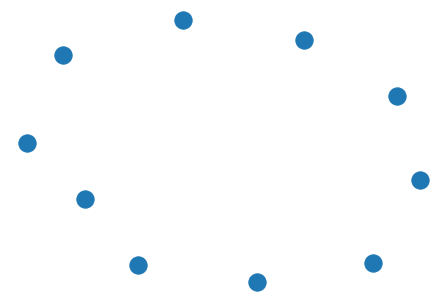

In [4]:
# add a group of nodes at once
H = nx.path_graph(10)
G.add_nodes_from(H)
nx.draw(G)

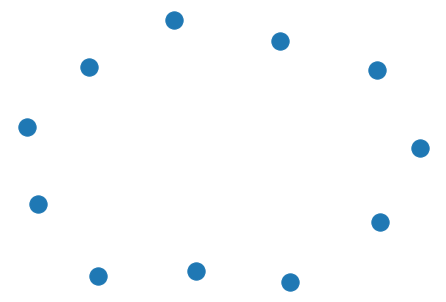

In [5]:
# add another graph itself as a node
G.add_node(H)
nx.draw(G)

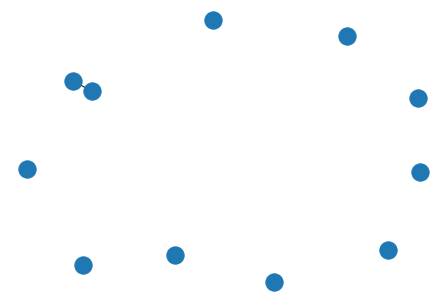

In [6]:
# add edges using similar methods
G.add_edge(1, 2)
nx.draw(G)

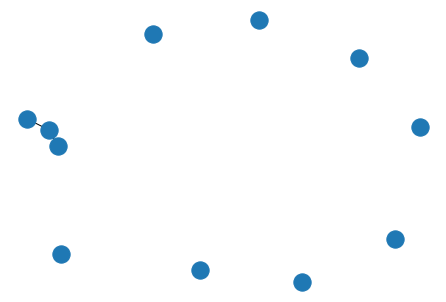

In [7]:
e = (2, 3)
G.add_edge(*e)
nx.draw(G)

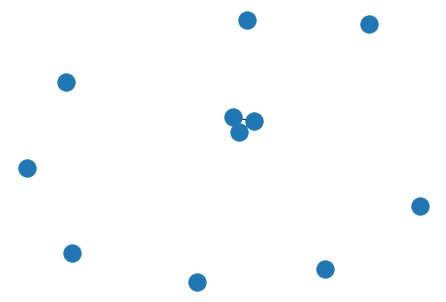

In [8]:
G.add_edges_from([(1, 2), (1, 3)])
nx.draw(G)

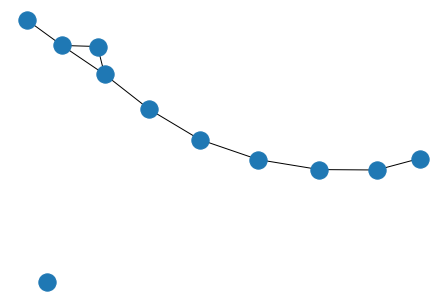

In [9]:
G.add_edges_from(H.edges())
nx.draw(G)

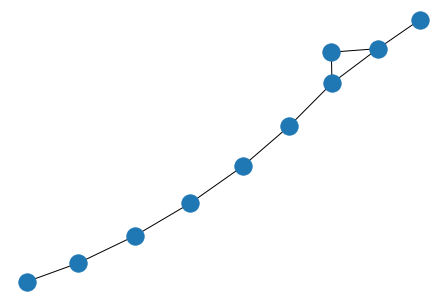

In [10]:
# can also remove or clear
G.remove_node(H)
nx.draw(G)

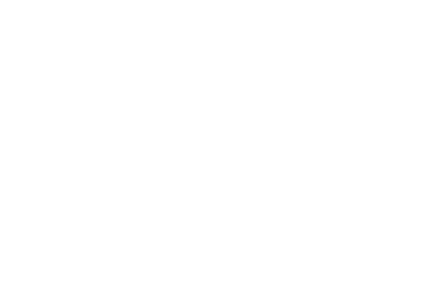

In [11]:
G.clear()
nx.draw(G)

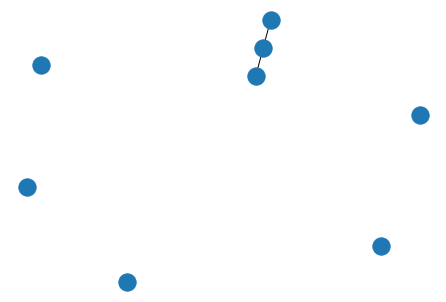

In [12]:
# repeats are ignored
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node('spam')       # adds node "spam"
G.add_nodes_from('spam') # adds 4 nodes: 's', 'p', 'a', 'm'
nx.draw(G)

In [13]:
# get the number of nodes and edges
f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}"

'Nodes: 8, Edges: 2'

In [14]:
# access graph edges
G[1]

AtlasView({2: {}, 3: {}})

In [15]:
G[1][2]

{}

In [16]:
# set an attribute of an edge
G.add_edge(1,3)
G[1][3]['color'] = 'blue'

In [17]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adjacency():
    for nbr, eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5: 
            print('(%d, %d, %.3f)' % (n, nbr, data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [18]:
# graph attribte
G = nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [19]:
# modifying an attribute
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

In [20]:
# node attributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]['room'] = 714
dict(G.nodes(data=True))

{1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}}

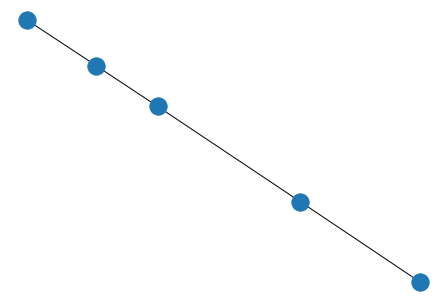

In [21]:
# edge attributes (weight is a special numeric attribute)
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2 ,{'color': 'blue'}), (2, 3, {'weight' :8})])
G[1][2]['weight'] = 4.7
nx.draw(G)

In [22]:
G.adj

AdjacencyView({1: {2: {'weight': 4.7, 'color': 'blue'}}, 3: {4: {'color': 'red'}, 2: {'weight': 8}}, 2: {1: {'weight': 4.7, 'color': 'blue'}, 3: {'weight': 8}}, 4: {3: {'color': 'red'}, 5: {'color': 'red'}}, 5: {4: {'color': 'red'}}})

In [23]:
G.adjacency()

In [24]:
list(G.adjacency())

[(1, {2: {'weight': 4.7, 'color': 'blue'}}),
 (3, {4: {'color': 'red'}, 2: {'weight': 8}}),
 (2, {1: {'weight': 4.7, 'color': 'blue'}, 3: {'weight': 8}}),
 (4, {3: {'color': 'red'}, 5: {'color': 'red'}}),
 (5, {4: {'color': 'red'}})]

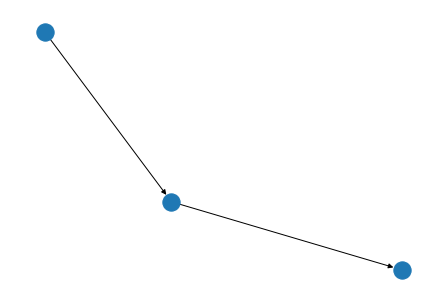

In [25]:
# directed graph
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2 ,0.5), (3, 1, 0.75)])
nx.draw(DG)

In [26]:
DG.out_degree(1, weight='weight')

0.5

In [27]:
DG.degree(1, weight='weight')

1.25

In [28]:
DG.successors(1)

In [29]:
list(DG.successors(1))

[2]

In [30]:
DG.predecessors(1)

In [31]:
list(DG.predecessors(1))

[3]

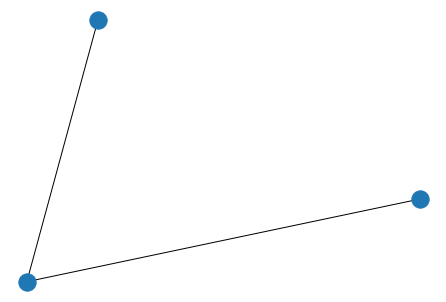

In [32]:
# convert to undirected graph
H = nx.Graph(DG)
nx.draw(H)